In [69]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split 

In [70]:
#Import data
df = pd.read_csv('credit.csv',header=1)
credit = df
credit.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [71]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30203 non-null  int64 
 1   ID                          30202 non-null  object
 2   LIMIT_BAL                   30203 non-null  object
 3   SEX                         30203 non-null  object
 4   EDUCATION                   30203 non-null  object
 5   MARRIAGE                    30203 non-null  object
 6   AGE                         30203 non-null  object
 7   PAY_0                       30203 non-null  object
 8   PAY_2                       30203 non-null  object
 9   PAY_3                       30203 non-null  object
 10  PAY_4                       30203 non-null  object
 11  PAY_5                       30203 non-null  object
 12  PAY_6                       30203 non-null  object
 13  BILL_AMT1                   30203 non-null  ob

In [72]:
print(credit.isnull().sum())

0                             0
ID                            1
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [73]:
credit[credit['ID'].isnull()]

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
201,202,NaN,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y


In [74]:
credit.dropna(inplace= True)

In [75]:
print(credit.isnull().sum())

0                             0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [76]:
print(credit.loc[200:208, :])

       0   ID  LIMIT_BAL     SEX        EDUCATION  MARRIAGE  AGE  PAY_0  \
200  201  201     180000  female  graduate school         1   38     -2   
202  203   ID  LIMIT_BAL     SEX        EDUCATION  MARRIAGE  AGE  PAY_0   
203  204    1      20000  female       university         1   24      2   
204  205    2     120000  female       university         2   26     -1   
205  206    3      90000  female       university         2   34      0   
206  207    4      50000  female       university         1   37      0   
207  208    5      50000    male       university         1   57     -1   
208  209    6      50000    male  graduate school         2   37      0   

     PAY_2  PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
200     -2     -2  ...          0          0          0         0         0   
202  PAY_2  PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
203      2     -1  ...          0          0          0         0       689   
204     

In [77]:
credit.drop(202, inplace=True)

In [78]:
print(credit.loc[200:208, :])

       0   ID LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2  \
200  201  201    180000  female  graduate school        1  38    -2    -2   
203  204    1     20000  female       university        1  24     2     2   
204  205    2    120000  female       university        2  26    -1     2   
205  206    3     90000  female       university        2  34     0     0   
206  207    4     50000  female       university        1  37     0     0   
207  208    5     50000    male       university        1  57    -1     0   
208  209    6     50000    male  graduate school        2  37     0     0   

    PAY_3  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
200    -2  ...         0         0         0        0        0        0   
203    -1  ...         0         0         0        0      689        0   
204     0  ...      3272      3455      3261        0     1000     1000   
205     0  ...     14331     14948     15549     1518     1500     1000   
206     

In [79]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30201 non-null  int64 
 1   ID                          30201 non-null  object
 2   LIMIT_BAL                   30201 non-null  object
 3   SEX                         30201 non-null  object
 4   EDUCATION                   30201 non-null  object
 5   MARRIAGE                    30201 non-null  object
 6   AGE                         30201 non-null  object
 7   PAY_0                       30201 non-null  object
 8   PAY_2                       30201 non-null  object
 9   PAY_3                       30201 non-null  object
 10  PAY_4                       30201 non-null  object
 11  PAY_5                       30201 non-null  object
 12  PAY_6                       30201 non-null  object
 13  BILL_AMT1                   30201 non-null  ob

In [80]:
credit.drop(0, inplace=True)
print(credit.loc[0:10, :])

     0  ID LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3  \
1    2   2    120000  female       university        2  26    -1     2     0   
2    3   3     90000  female       university        2  34     0     0     0   
3    4   4     50000  female       university        1  37     0     0     0   
4    5   5     50000    male       university        1  57    -1     0    -1   
5    6   6     50000    male  graduate school        2  37     0     0     0   
6    7   7    500000    male  graduate school        2  29     0     0     0   
7    8   8    100000  female       university        2  23     0    -1    -1   
8    9   9    140000  female      high school        1  28     0     0     2   
9   10  10     20000    male      high school        2  35    -2    -2    -2   
10  11  11    200000  female      high school        2  34     0     0     2   

    ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
1   ...      3272      3455      3261     

In [81]:
credit['ID'] = credit['ID'].astype(int)
credit['ID'].dtypes
credit['LIMIT_BAL'] = credit['LIMIT_BAL'].astype(int)
credit['LIMIT_BAL'].dtypes
credit['MARRIAGE'] = credit['MARRIAGE'].astype(int)
credit['MARRIAGE'].dtypes
credit['AGE'] = credit['AGE'].astype(int)
credit['AGE'].dtypes
credit['PAY_0'] = credit['PAY_0'].astype(int)
credit['PAY_0'].dtypes
credit['PAY_2'] = credit['PAY_2'].astype(int)
credit['PAY_2'].dtypes
credit['PAY_3'] = credit['PAY_3'].astype(int)
credit['PAY_3'].dtypes
credit['PAY_4'] = credit['PAY_4'].astype(int)
credit['PAY_4'].dtypes
credit['PAY_5'] = credit['PAY_5'].astype(int)
credit['PAY_5'].dtypes
credit['PAY_6'] = credit['PAY_6'].astype(int)
credit['PAY_6'].dtypes
credit['BILL_AMT1'] = credit['BILL_AMT1'].astype(int)
credit['BILL_AMT1'].dtypes
credit['BILL_AMT2'] = credit['BILL_AMT2'].astype(int)
credit['BILL_AMT2'].dtypes
credit['BILL_AMT3'] = credit['BILL_AMT3'].astype(int)
credit['BILL_AMT3'].dtypes
credit['BILL_AMT4'] = credit['BILL_AMT4'].astype(int)
credit['BILL_AMT4'].dtypes
credit['BILL_AMT5'] = credit['BILL_AMT5'].astype(int)
credit['BILL_AMT5'].dtypes
credit['BILL_AMT6'] = credit['BILL_AMT6'].astype(int)
credit['BILL_AMT6'].dtypes
credit['PAY_AMT1'] = credit['PAY_AMT1'].astype(int)
credit['PAY_AMT1'].dtypes
credit['PAY_AMT2'] = credit['PAY_AMT2'].astype(int)
credit['PAY_AMT2'].dtypes
credit['PAY_AMT3'] = credit['PAY_AMT3'].astype(int)
credit['PAY_AMT3'].dtypes
credit['PAY_AMT4'] = credit['PAY_AMT4'].astype(int)
credit['PAY_AMT4'].dtypes
credit['PAY_AMT5'] = credit['PAY_AMT5'].astype(int)
credit['PAY_AMT5'].dtypes
credit['PAY_AMT6'] = credit['PAY_AMT6'].astype(int)
credit['PAY_AMT6'].dtypes

dtype('int32')

In [82]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30200 entries, 1 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30200 non-null  int64 
 1   ID                          30200 non-null  int32 
 2   LIMIT_BAL                   30200 non-null  int32 
 3   SEX                         30200 non-null  object
 4   EDUCATION                   30200 non-null  object
 5   MARRIAGE                    30200 non-null  int32 
 6   AGE                         30200 non-null  int32 
 7   PAY_0                       30200 non-null  int32 
 8   PAY_2                       30200 non-null  int32 
 9   PAY_3                       30200 non-null  int32 
 10  PAY_4                       30200 non-null  int32 
 11  PAY_5                       30200 non-null  int32 
 12  PAY_6                       30200 non-null  int32 
 13  BILL_AMT1                   30200 non-null  in

In [83]:
credit = pd.get_dummies(credit)

In [84]:
x = credit.loc[:, credit.columns != 'LIMIT_BAL']
print('Summary of feature sample')
x.head()

Summary of feature sample


,0,ID,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
1,2,2,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,3,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,4,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,5,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1
5,6,6,2,37,0,0,0,0,0,0,...,1000,800,0,1,1,0,0,0,0,1


In [85]:
y = credit['LIMIT_BAL']
y.head()

1    120000
2     90000
3     50000
4     50000
5     50000
Name: LIMIT_BAL, dtype: int32

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)
x_train.head()

,0,ID,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
13193,13194,12991,1,36,1,2,2,2,0,0,...,0,0,1,0,0,1,0,0,1,0
18144,18145,17942,2,32,0,0,0,0,0,0,...,4000,7200,0,1,0,0,0,1,0,1
13726,13727,13524,1,40,-1,-1,-1,-2,-2,-2,...,0,0,1,0,0,0,0,1,0,1
10371,10372,10169,1,39,0,0,0,0,0,-1,...,14587,1706,1,0,1,0,0,0,0,1
11767,11768,11565,1,30,-2,-1,-1,-2,-1,-1,...,962,0,1,0,0,0,0,1,0,1


In [89]:
#dependent variable
print(y)

1        120000
2         90000
3         50000
4         50000
5         50000
          ...  
30198    220000
30199    150000
30200     30000
30201     80000
30202     50000
Name: LIMIT_BAL, Length: 30200, dtype: int32


In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 123)

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [159]:
#Modeling (Classification)
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [160]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [161]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.44844419074310027


In [162]:
model = RandomForestRegressor(n_jobs=10)

In [163]:
print(cross_val_score(model, x, y, cv=3))

[0.42445682 0.4802798  0.43464501]


In [164]:
algo =  RandomForestRegressor()
model = algo.fit(x_train,y_train)

In [165]:
preds = model.predict(x_test)
print(preds)

[304200.  88900. 111800. ... 192800. 119600. 224900.]


In [167]:
#Make Predictions
predictions = model.predict(x_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.485
RMSE: 92355.376


In [168]:
predRsquared = r2_score(y_test,predictions)
print(predRsquared)

0.4848763439080934


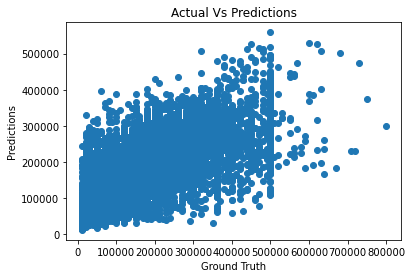

In [169]:
plt.scatter(y_test, predictions, alpha = 1.0)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Actual Vs Predictions')
plt.show()

In [170]:
algosClass = []
algosClass.append(('Linear Regression',LinearRegression()))

In [171]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [172]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Linear Regression 0.3568088544403776


In [173]:
model = LinearRegression(n_jobs=10)

In [174]:
print(cross_val_score(model, x, y, cv=3))

[0.35739278 0.37882991 0.33420387]


In [175]:
algo = LinearRegression()
model = algo.fit(x_train,y_train)

In [176]:
preds = model.predict(x_test)
print(preds)

[240583.91003714  45783.72858324 124849.91310067 ... 196171.0045659
  97327.19386453 193679.72550551]


In [177]:
#Make Predictions
predictions = model.predict(x_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.366
RMSE: 102465.755


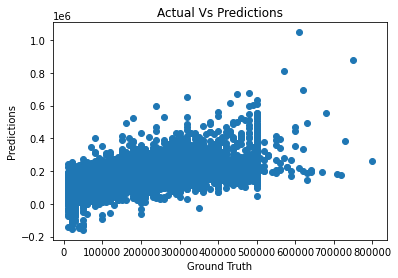

In [178]:
plt.scatter(y_test, predictions, alpha = 1.0)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Actual Vs Predictions')
plt.show()

In [180]:
algosClass = []
algosClass.append(('Support Vector Regression',SVR()))

In [181]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, x,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [182]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Support Vector Regression -0.05082927663289719


In [183]:
model = LinearRegression(n_jobs=10)

In [184]:
print(cross_val_score(model, x, y, cv=3))

[0.35739278 0.37882991 0.33420387]


In [185]:
algo = SVR()
model = algo.fit(x_train,y_train)

In [187]:
preds = model.predict(x_test)
print(preds)

[139907.16795294 139828.30433166 139325.18338013 ... 140776.15822313
 139729.95562167 139908.94868688]


In [188]:
#Make Predictions
predictions = model.predict(x_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.039
RMSE: 131139.480


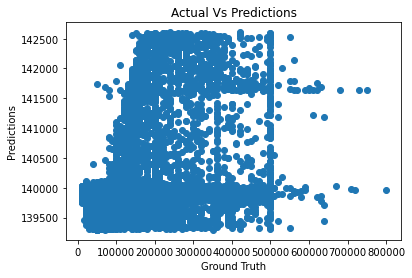

In [189]:
plt.scatter(y_test, predictions, alpha = 1.0)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Actual Vs Predictions')
plt.show()